### About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

1. Show_id: Unique ID for every Movie / Tv Show
2. Type: Identifier - A Movie or TV Show
3. Title: Title of the Movie / Tv Show
4. Director: Director of the Movie
5. Cast: Actors involved in the movie/show
6. Country: Country where the movie/show was produced
7. Date_added: Date it was added on Netflix
8. Release_year: Actual Release year of the movie/show
9. Rating: TV Rating of the movie/show
10. Duration: Total Duration - in minutes or number of seasons
11. Listed_in: Genre
12. Description: The summary description



1. The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
2. Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
3. Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
4. Start by exploring a few questions: What type of content is available in different countries?
5. How has the number of movies released per year changed over the last 20-30 years?
6. Comparison of tv shows vs. movies.
7. What is the best time to launch a TV show?
8. Analysis of actors/directors of different types of shows/movies.
9. Does Netflix has more focus on TV Shows than movies in recent years
10. Understanding what content is available in different countries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('netflix_scaler_business_case.csv')
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4334,s4335,Movie,Break Up 100,Lawrence Cheng,"Ekin Cheng, Chrissie Chow, Ivana Wong, Jase Ho...",Hong Kong,"December 1, 2018",2014,TV-14,105 min,"Comedies, International Movies, Romantic Movies","After their 99th breakup, a career woman and h..."
3486,s3487,Movie,Malaal,Mangesh Hadawale,"Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve...",India,"September 26, 2019",2019,TV-14,133 min,"Dramas, International Movies, Romantic Movies",Class divides become thorns in the budding rom...
1479,s1480,TV Show,SanPa: Sins of the Savior,Cosima Spender,NaN,Italy,"December 30, 2020",2020,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Amidst a heroin crisis, Vincenzo Muccioli care..."
2370,s2371,Movie,El límite infinito,Pablo Aulita,Jean Maggi,NaN,"June 18, 2020",2020,TV-PG,48 min,"Documentaries, International Movies, Sports Mo...",From early struggles to his climb up the Himal...
3117,s3118,TV Show,The Witcher,NaN,"Henry Cavill, Anya Chalotra, Freya Allan, Jodh...","United States, Poland","December 20, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","Geralt of Rivia, a mutated monster-hunter for ..."
4350,s4351,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
2511,s2512,Movie,Wadjda,Haifaa Al-Mansour,"Reem Abdullah, Waad Mohammed, Abdullrahman Al ...","Saudi Arabia, Netherlands, Germany, Jordan, Un...","May 19, 2020",2012,PG,93 min,"Dramas, Independent Movies, International Movies",A persistent 10-year-old wishes for a new bicy...
4373,s4374,Movie,Puppy Star Christmas,Robert Vince,"Kaitlyn Maher, Mackenzie Sol, Makenzie Moss, D...","United States, Canada","November 20, 2018",2018,PG,91 min,"Children & Family Movies, Comedies",A new pack of Pup Star pooches stumbles upon a...
5773,s5774,Movie,My Little Pony Equestria Girls: Legend of Ever...,Ishi Rudell,"Tara Strong, Rebecca Shoichet, Ashleigh Ball, ...","United States, Canada","October 1, 2016",2016,TV-Y7,73 min,"Children & Family Movies, Comedies","The Equestria Girls, human teen counterparts t..."
667,s668,TV Show,Glee,NaN,"Lea Michele, Chris Colfer, Jane Lynch, Matthew...",United States,"June 19, 2021",2015,TV-14,6 Seasons,"TV Comedies, TV Dramas, Teen TV Shows",Amid relationship woes and personal attacks fr...


## Basic Observations of the dataset

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### 1. Dataset contains missing values
#### 2. In this dataset there are 12 features/columns and 8870 rows. Out of these 12 features, one is numerical feature and all others are categorical features

In [5]:
df.duplicated().sum()

0

#### No Duplicate values/rows

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

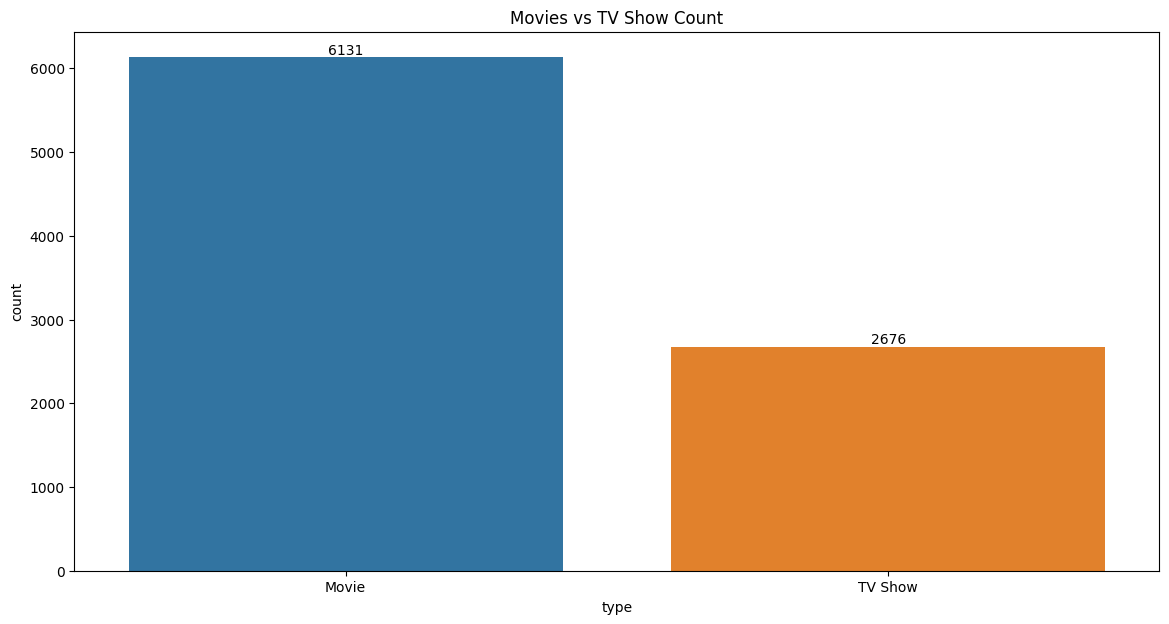

In [8]:
plt.figure(figsize=(14,7))
ax = sns.countplot(data=df, x='type')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.title("Movies vs TV Show Count")
plt.show()

#### There is date of **6131** movies and **2676** tv-shows in this dataset

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Counting unique no of director, cast and country

#### Four features contain null values out of 12. 
1. director column has **2634** null values
2. cast column has **825** null values
3. country column has **831** null values
4. date_added column has **10** null values
5. rating column has **4** missing values
6. duration column has **3** missing values


In [10]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


### For handling missing values in rating column, I will replaced it with the mode of the respective type (i.e. movie and tv-show)

In [11]:
df.groupby('type')['rating'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object

In [12]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

#### Verifying if the NaN values has been replaced

In [13]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Rating column data distribution

In [14]:
df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

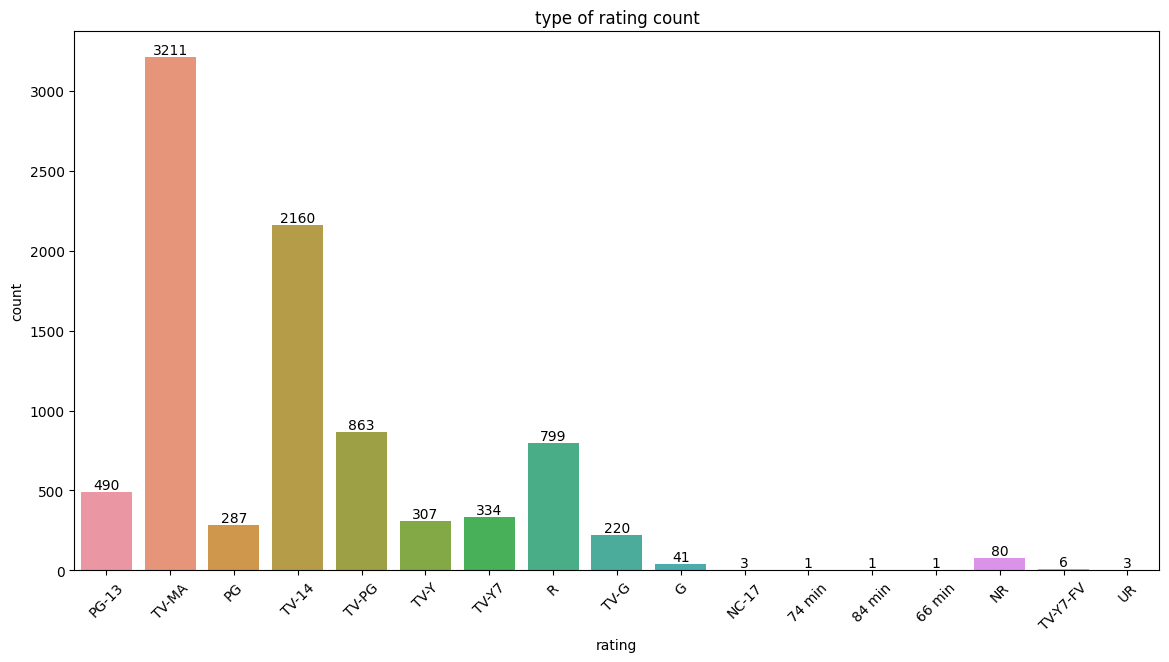

In [15]:
plt.figure(figsize=(14,7))
ax = sns.countplot(data=df, x='rating')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation = 45)
plt.title('type of rating count')
plt.show()

#### Maximum ratings are **TV-MA (Mature Audience)** followed by **TV-14 (Parents Strongly Cautioned)** and T**V-PG (Parental Guidance Suggested)**

In [16]:
df[df['duration'].isnull()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### For duration column null values, it is observed that the missing values in duration column has been misplaced. Therefore we need to replace it with the rating values by hard coding it. 

In [17]:
df.loc[[5541, 5794, 5813], 'duration'] = '74 min', '84 min', '66 min'

#### Verifying if the NaN values have been replaced

In [18]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Handling missing values in date_added column

In [19]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


### It is observed that all the missing values in date_added column are from the tv-show. There is no missing values in  date_added column when the type is movies

### Since there are only 10 missing values in date_added column, I am hard coding it

In [20]:
df.loc[df['title'] == 'Friends', 'date_added'] = 'January 1, 2015'
df.loc[df['title'] == 'Gunslinger Girl', 'date_added'] = 'January 1, 2016'
df.loc[df['title'] == 'Maron', 'date_added'] = 'March 17, 2017'

### I have found only these 3 TV Shows on netflix that's why I am hard coding it and dropping other missing values since they are not anymore in the netflix database.

In [21]:
df['date_added'].isnull().sum()

7

In [22]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [23]:
df.drop(index=[6066, 6174, 6795, 7196, 7254, 7847, 8182], inplace=True)

In [24]:
df[df['date_added'].isnull()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Checking total missing values for each column

In [25]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2627
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64



### Oldest movie/tv-show in the given dataset

In [26]:
df.loc[df['release_year']==df['release_year'].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


#### Pioneers: First Women Filmmakers is the oldest tv show in the given dataset

### Extracting inside from the date_added columns

In [27]:
# Strip any leading/trailing whitespace from the 'date_added' column
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' to datetime format, inferring the format
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_19894/3081264018.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)


In [28]:
df['date_added_year'] = df['date_added'].dt.year
df['date_added_month'] = df['date_added'].dt.month
df['date_added_day'] = df['date_added'].dt.day

# If you prefer the format 'YYYY-MM'
df['date_added_month_year'] = df['date_added'].dt.to_period('M')
df['date_added_month_year'] = df['date_added'].dt.strftime('%Y-%m')

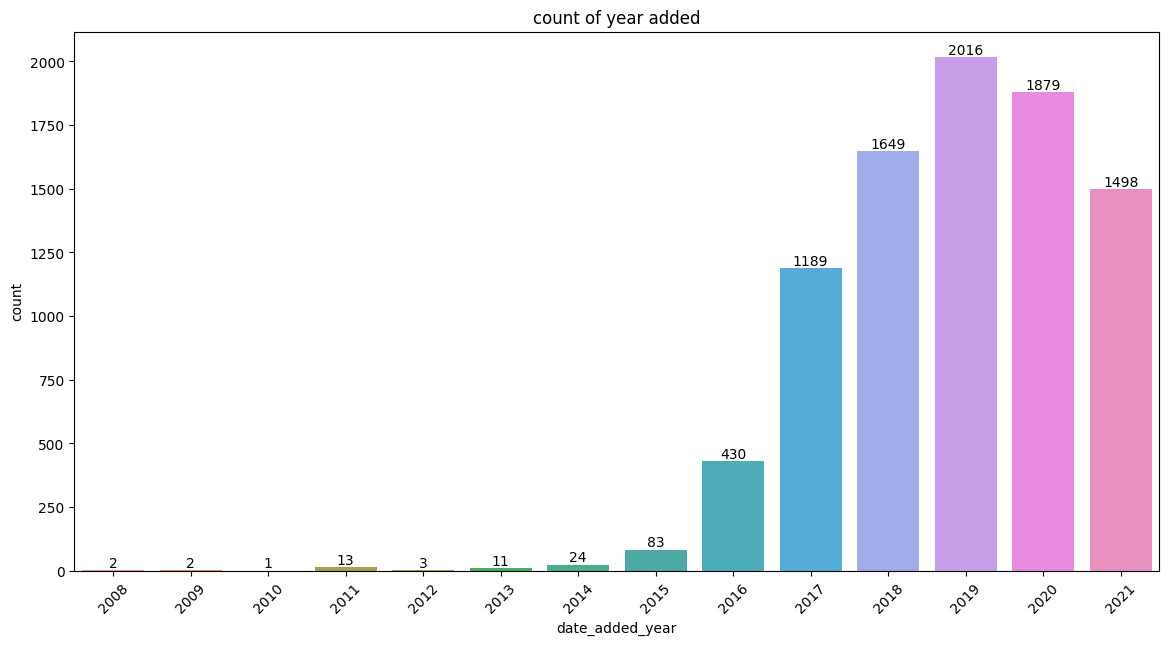

In [29]:
plt.figure(figsize=(14,7))
ax = sns.countplot(data=df, x='date_added_year')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation = 45)
plt.title('count of year added')
plt.show()

In [30]:
# Group by year and type to get counts
counts = df.groupby(['date_added_year', 'type']).size().reset_index(name='count')
# Create the line plot
fig = px.line(counts, x='date_added_year', y='count', color='type', title='Number of Movies and TV Shows Released Each Year')

# Show the plot
fig.show()

### for the past few years, there is a drastic increase in the number of movies and tv shows added into the netflix database

In [31]:
counts = df.groupby(['date_added_month_year', 'type']).size().reset_index(name='count')

# Create a line plot
fig = px.line(counts, x='date_added_month_year', y='count', color='type', title='Number of Movies and TV Shows Added Over Time')

# Customize the plot
fig.update_xaxes(title='Month-Year', tickangle=45)
fig.update_yaxes(title='Count')
fig.update_layout(title='Number of Movies and TV Shows Added Each Month')


# Show the plot
fig.show()

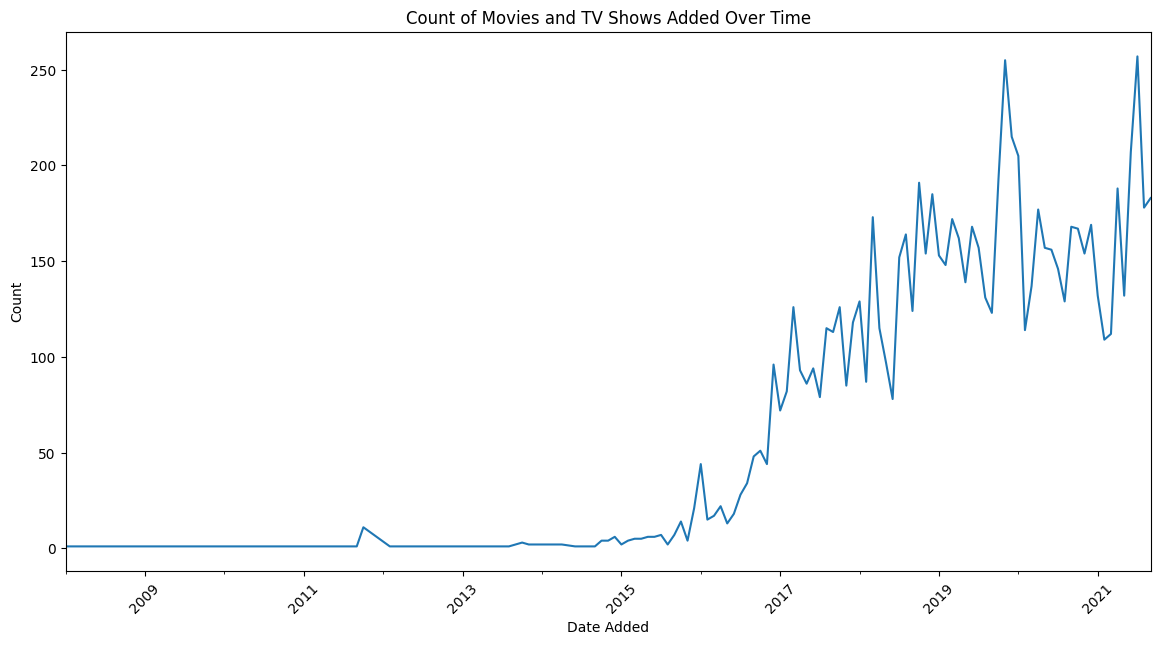

In [32]:
df['date_added'] = pd.to_datetime(df['date_added'])

plt.figure(figsize=(14, 7))
df.groupby(df['date_added'].dt.to_period('M')).size().plot()
plt.title('Count of Movies and TV Shows Added Over Time')
plt.xlabel('Date Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### As compared to past years the number of movies and tv-shows added in the netflix website have been increased dramatically.

In [33]:
# Count the occurrences of each day
day_counts = df['date_added_month'].value_counts().reset_index()
day_counts.columns = ['date_added_month', 'count']

# Create the bar plot
fig = px.bar(day_counts, x='date_added_month', y='count', title='Best Month to Launch content')


# Add annotations
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Rotate x-axis labels
fig.update_layout(xaxis={'categoryorder':'category ascending'}, xaxis_tickangle=45)

# Show the plot
fig.show()

In [34]:
# Group by year and type to get counts
counts = df.groupby(['date_added_month', 'type']).size().reset_index(name='count')

# Create the line plot
fig = px.line(counts, x='date_added_month', y='count', color='type', title='Number of Movies and TV Shows Released Each Month')

# Show the plot
fig.show()

#### Movies and TV-Shows added in the month of july is maximum followed by december month

In [35]:
# Count the occurrences of each day
day_counts = df['date_added_day'].value_counts().reset_index()
day_counts.columns = ['date_added_day', 'count']

# Create the bar plot

fig = px.bar(day_counts, x='date_added_day', y='count', title='Best Date to Launch a TV Show')

# Add annotations
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Rotate x-axis labels
fig.update_layout(xaxis={'categoryorder':'category ascending'}, xaxis_tickangle=45)

# Show the plot
fig.show()

In [36]:
# Group by year and type to get counts
counts = df.groupby(['date_added_day', 'type']).size().reset_index(name='count')

# Create the line plot
fig = px.line(counts, x='date_added_day', y='count', color='type', title='Number of Movies and TV Shows Released Each Day')

# Show the plot
fig.show()

#### Best Time to add tv-show in Netflix 


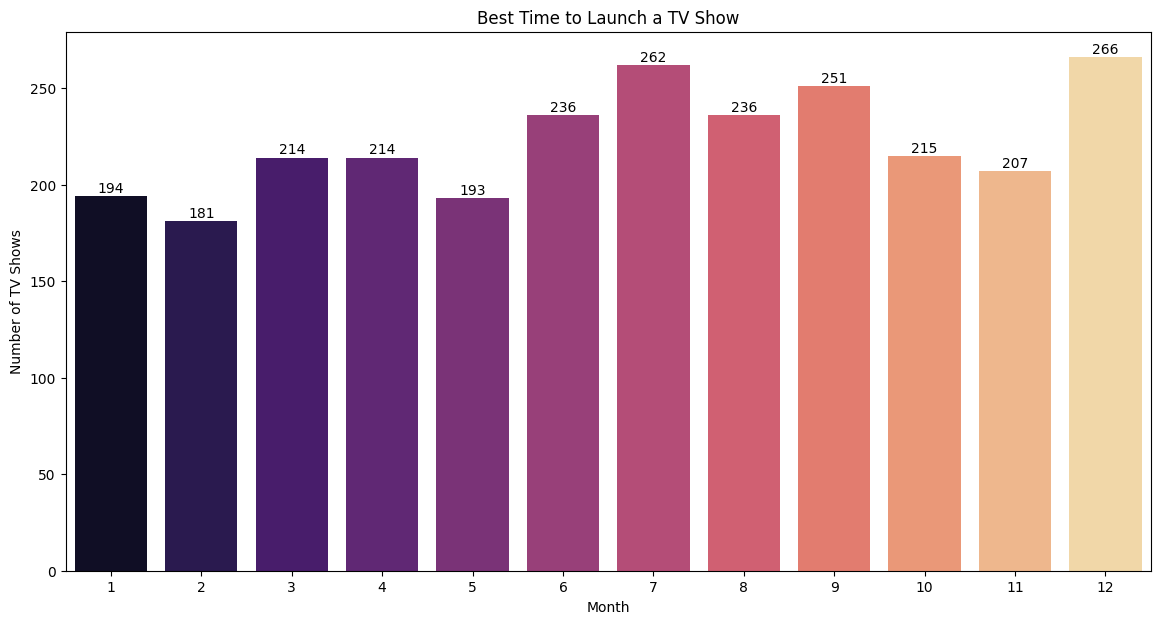

In [37]:
tv_shows = df[df['type'] == 'TV Show']

# Count the number of TV shows added per month
tv_shows_per_month = tv_shows['date_added_month'].value_counts().sort_index().reset_index()
tv_shows_per_month.columns = ['month', 'count']

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=tv_shows_per_month, x='month', y='count', palette='magma')
plt.title('Best Time to Launch a TV Show')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 2,
            s=f'{int(height)}',
            ha='center')

plt.show()

### In dec and july month it is launch a new show 

#### Best Time to add movies in Netflix 


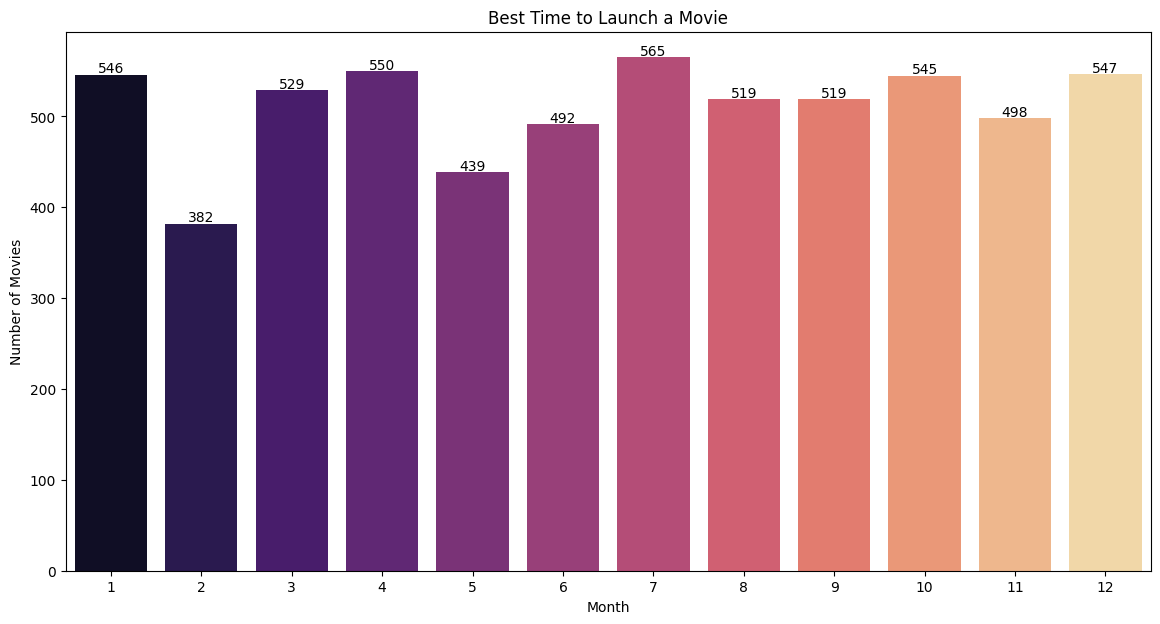

In [38]:
movies = df[df['type'] == 'Movie']

# Count the number of movies added per month
movies_per_month = movies['date_added_month'].value_counts().sort_index().reset_index()
movies_per_month.columns = ['month', 'count']

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=movies_per_month, x='month', y='count', palette='magma')
plt.title('Best Time to Launch a Movie')
plt.xlabel('Month')
plt.ylabel('Number of Movies')

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 2,
            s=f'{int(height)}',
            ha='center')

plt.show()

### For movies, month Jan, July April and October are best to launch. However, the team can also consider to launch movies in other months as well like March, September and August

### It has been observed that on the first day of the month, maximum no of movies and tv-shows are added in the netflix library followed by 15th of the month

### Average Movie Duration

In [39]:
df_movies = df.loc[df['type']=='Movie']
df_movies.shape

(6131, 16)

In [40]:
# Ensure 'duration' is of type string and handle missing values
df_movies['duration'] = df_movies['duration'].astype(str)

# Extract the numeric duration, handling possible missing values
df_movies['duration_minutes'] = df_movies['duration'].apply(lambda x: int(x.split()[0]) if x != 'nan' else None)


/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_19894/1633668209.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_19894/1633668209.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



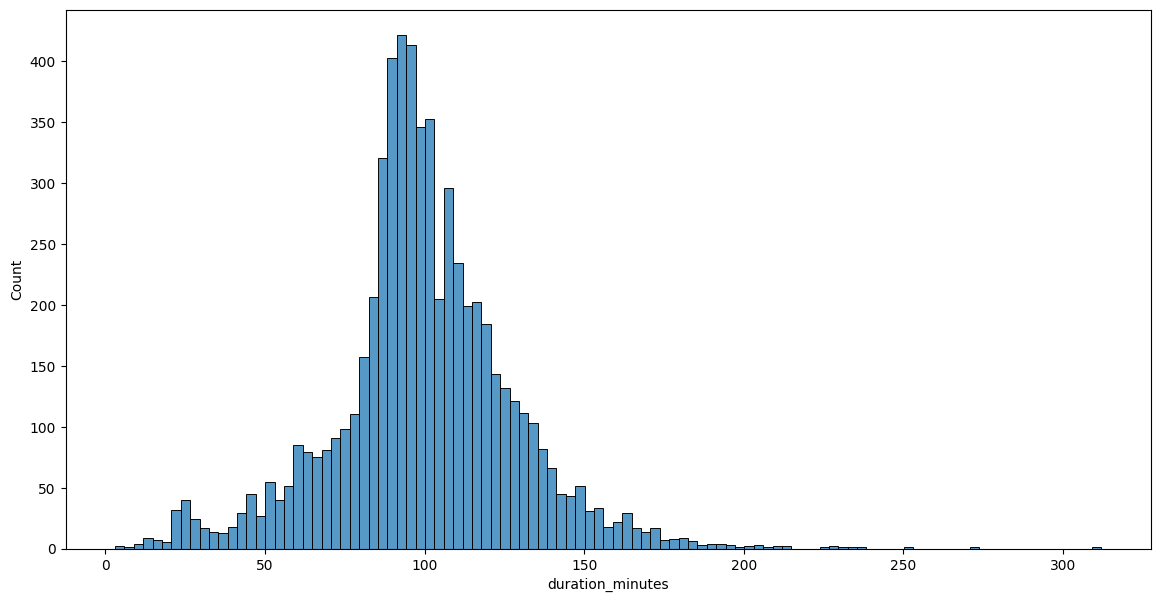

In [41]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_movies, x='duration_minutes')
plt.show()

### Average Movie Duration time

In [42]:
df_movies['duration_minutes'].value_counts()

duration_minutes
90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: count, Length: 205, dtype: int64

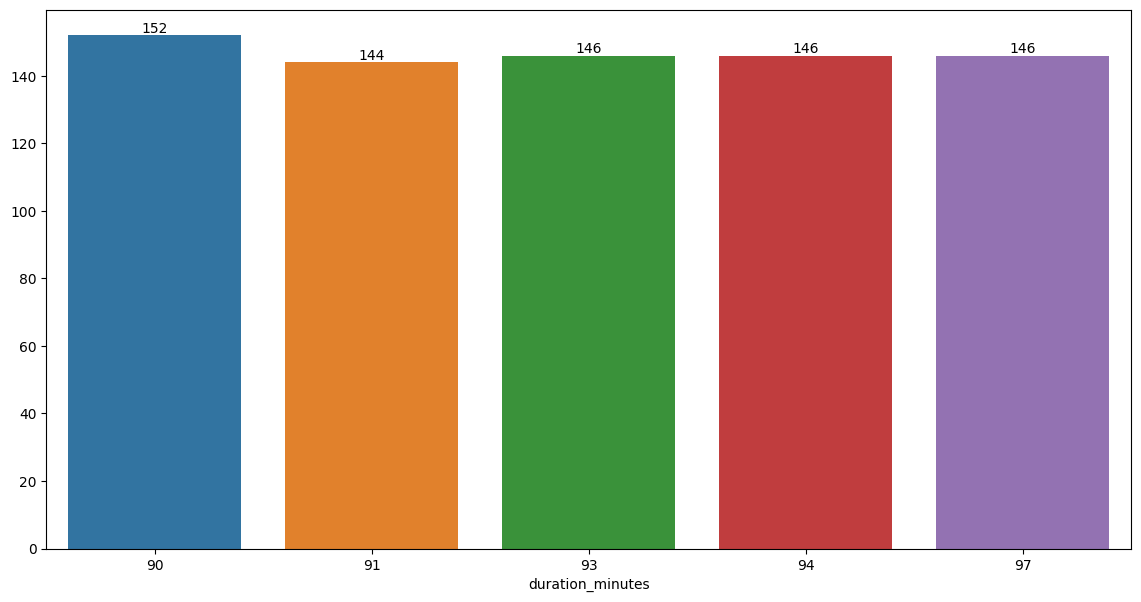

In [43]:
a = df_movies['duration_minutes'].value_counts()
b = a.head()

plt.figure(figsize=(14,7))

ax = sns.barplot(data=df_movies, x=b.index, y=b.values)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()

In [44]:
print(df_movies['duration_minutes'].mean())

99.56499755341706


### In this dataset, the average movie duration is 99 minutes.

### Average no of season in tv-shows

In [45]:
df_tvshow = df.loc[df['type']=='TV Show']
df_tvshow.shape

(2669, 16)

In [46]:
df_tvshow['duration'] = df_tvshow['duration'].astype(str)
df_tvshow['no_of_season'] = df_tvshow['duration'].apply(lambda x: int(x.split()[0]) if x != 'nan' else None)


/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_19894/3044276648.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_19894/3044276648.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
df_tvshow['no_of_season'].value_counts()

no_of_season
1     1793
2      422
3      198
4       95
5       64
6       33
7       23
8       17
9        9
10       7
13       2
15       2
12       2
17       1
11       1
Name: count, dtype: int64

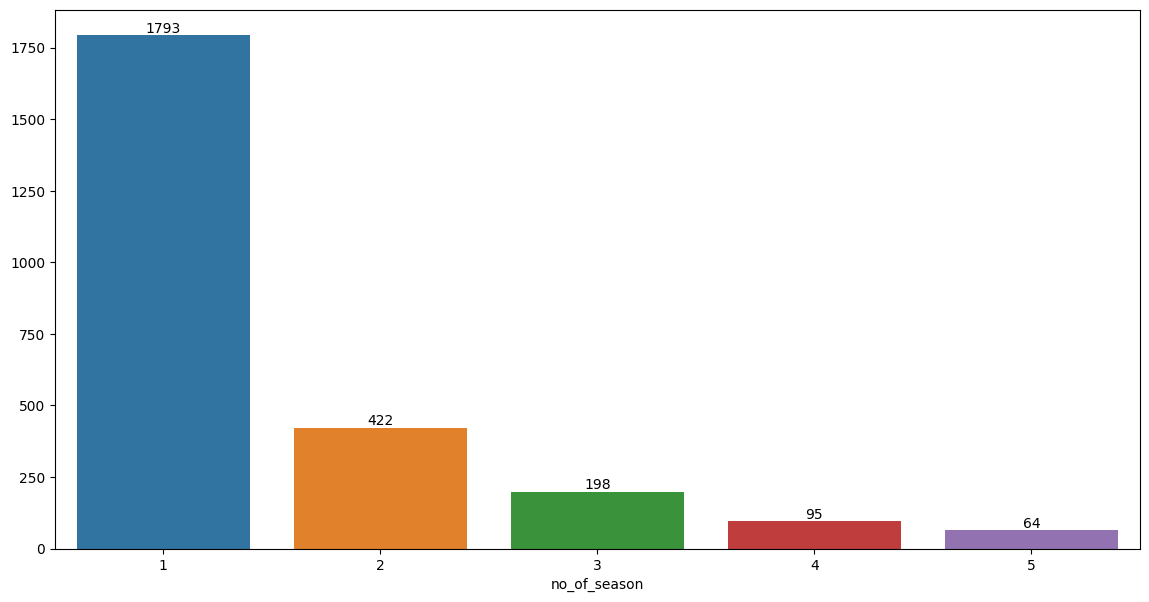

In [48]:
plt.figure(figsize=(14,7))

a = df_tvshow['no_of_season'].value_counts()
b = a.head()

ax = sns.barplot(data=df_tvshow, x=b.index, y=b.values)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()

### In the given dataset, maximum number of tv-shows have only 1 season followed by 2 and 3 seasons.

### Dropping date_added_year, date_added_month, date_added_day, date_added_month_year after performing visualization

In [49]:
df.drop(['date_added_year', 'date_added_month', 'date_added_day', 'date_added_month_year'], inplace=True, axis=1)

### Handling missing values in country column

### Distribution of data w.r.t countries
df['country'].value_counts()
#### In netflix, most of the movies/tv-shows are from the **USA** followed by **India, UK, Japan and South Korea's (K-show)**

### Where ever two or more values are there in cast, director, country and listed_in features, assigning them different rows and merge it with final dataframe to better analyze the data.

### For director column

In [50]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(",")).to_list(), index=df['title'])
df_director = df_director.stack().reset_index()

df_director.drop('level_1', inplace=True, axis=1)
df_director.rename({0:'director'},axis=1,inplace=True)
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9600,Zodiac,David Fincher
9601,Zombie Dumb,nan
9602,Zombieland,Ruben Fleischer
9603,Zoom,Peter Hewitt


### For cast column

In [51]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(",")).to_list(), index=df['title'])
df_cast = df_cast.stack().reset_index()

df_cast.drop('level_1', axis=1,  inplace=True)
df_cast.rename({0:'cast'},axis=1,inplace=True)
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64906,Zubaan,Manish Chaudhary
64907,Zubaan,Meghna Malik
64908,Zubaan,Malkeet Rauni
64909,Zubaan,Anita Shabdish


### For listed_in/ Genre column

In [52]:
df_listed_in = pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(",")).to_list(), index=df['title'])
df_listed_in = df_listed_in.stack().reset_index()
df_listed_in.drop('level_1', inplace=True, axis=1)
df_listed_in.rename({0:'listed_in'},axis=1,inplace=True)
df_listed_in

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19303,Zoom,Children & Family Movies
19304,Zoom,Comedies
19305,Zubaan,Dramas
19306,Zubaan,International Movies


### For country column

In [53]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(",")).to_list(), index=df['title'])
df_country = df_country.stack().reset_index()

df_country.drop('level_1', axis=1,  inplace=True)
df_country.rename({0:'country'},axis=1,inplace=True)
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10838,Zodiac,United States
10839,Zombie Dumb,nan
10840,Zombieland,United States
10841,Zoom,United States


### Merging all the data frame with original data frame

In [54]:
# Merge df_country and df_listed_in on 'title'
df_merged = pd.merge(df_country, df_listed_in, on='title', how='inner')

# Merge the result with df_cast on 'title'
df_merged = pd.merge(df_merged, df_cast, on='title', how='inner')

# Merge the result with df_director on 'title'
df_merged = pd.merge(df_merged, df_director, on='title', how='inner')

df_merged.shape

(201960, 5)

In [55]:
df_merged.sample(10)

,title,country,listed_in,cast,director
10667,Deep,Thailand,Thrillers,Krit Jeerapattananuwong,Thanabodee Uawithya
108745,The Laws of Thermodynamics,Spain,Comedies,Chino Darín,Mateo Gil
43221,Rebecca,United Kingdom,Dramas,Keeley Hawes,Ben Wheatley
112998,Anon,Canada,Thrillers,Ethan Tavares,Andrew Niccol
147926,Crash,United States,Dramas,Jennifer Esposito,Paul Haggis
137132,Abby Sen,India,Comedies,Tuhin Mitra,Atanu Ghosh
173633,Nymphomaniac: Volume 1,France,Independent Movies,Stellan Skarsgård,Lars von Trier
151835,Entanglement,Canada,Dramas,Diana Bang,Jason James
194531,The Returned,France,TV Horror,Laetitia de Fombelle,nan
163309,Kahlil Gibran's The Prophet,Lebanon,Children & Family Movies,Alfred Molina,Tomm Moore


In [56]:
df_final = df_merged.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration','description']] , how = 'inner', on = 'title')

df_final.shape

(201960, 12)

In [57]:
df_final.columns

Index(['title', 'country', 'listed_in', 'cast', 'director', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

In [58]:
df_final.sample(10)

,title,country,listed_in,cast,director,show_id,type,date_added,release_year,rating,duration,description
67761,Freaks,Canada,Thrillers,Lexy Kolker,Zach Lipovsky,s2848,Movie,2020-03-03,2018,R,105 min,"Hidden away by her eccentric father, a mysteri..."
184427,Station Horizon,Switzerland,International TV Shows,Bernard Yerlès,nan,s8086,TV Show,2016-09-01,2015,TV-MA,1 Season,"Ex-con Joris returns to his Swiss hometown, a ..."
70884,The Car: Road to Revenge,United States,Sci-Fi & Fantasy,Kathleen Munroe,G.J. Echternkamp,s2969,Movie,2020-02-01,2019,TV-MA,89 min,"Trying to uphold justice in a lawless future, ..."
197967,True to the Game,United States,Dramas,Erica Peeples,Preston A. Whitmore II,s8637,Movie,2018-03-01,2017,R,108 min,When a drug kingpin looking to go legit falls ...
123837,Intersection,Turkey,International TV Shows,Alican Yücesoy,nan,s5396,TV Show,2017-07-01,2016,TV-MA,3 Seasons,Two wealthy businessmen with car obsessions cr...
72587,Medical Police,United States,Crime TV Shows,Rob Huebel,nan,s3038,TV Show,2020-01-10,2020,TV-MA,1 Season,Doctors Owen Maestro and Lola Spratt leave Chi...
137077,Aarakshan,India,Dramas,Yashpal Sharma,Prakash Jha,s6074,Movie,2019-12-31,2011,TV-14,164 min,The decision by India's supreme court to estab...
145921,Child's Play,United States,Cult Movies,Brad Dourif,Tom Holland,s6469,Movie,2019-12-31,1988,R,87 min,"When a rash of murders unfolds, 6-year-old And..."
82782,Cheese in the Trap,South Korea,International TV Shows,Park Min-ji,Lee Yoon-jung,s3462,TV Show,2019-10-01,2016,TV-14,1 Season,"In this adaptation of a popular webtoon, a poo..."
112947,Anon,United Kingdom,Dramas,Rachel Roberts,Andrew Niccol,s4876,Movie,2018-05-04,2018,TV-MA,100 min,In a future where technology has rendered priv...


### Checking and Dropping duplicate values if any

In [59]:
df_final.duplicated().sum()

7

In [60]:
df_final.drop_duplicates(inplace=True)

### Replacing **nan** string to **np.nan**

In [61]:
df_final.replace('nan', np.nan, inplace=True)

In [62]:
df_final.isnull().sum()

title               0
country         11896
listed_in           0
cast             2149
director        50538
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
description         0
dtype: int64

## Handling missing values:

1. For handling missing values in country column, we will replace null value with country having same or alike cast/director
2. For handling missing values in director column, we will replace null value with unknown director
3. For handling missing values in cast column, we will replace null value with unknown cast


In [63]:
df_final['director'].nunique()

5120

In [64]:
df_final['cast'].nunique()


39272

### Replacing Missing values in country column by searching the name of same director

## Handling missing values for country column

### Filling country null values w.r.t. same director and cast's country

In [65]:
country_director_dict = df_final[df_final['director'].notna()].groupby('director')['country'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
len(country_director_dict) #verifying the length of dict w.r.t. total no of directors beside nan value

5120

In [66]:
def replace_unknown_country(row):
    if pd.isnull(row['country']):
        return country_director_dict.get(row['director'], row['country'])
    return row['country']

df_final['country'] = df_final.apply(replace_unknown_country, axis=1)

df_final[df_final['country'].isnull()].shape

(9599, 12)

#### Filling country missing values with country value of same cast name

In [67]:
df_final[df_final['cast'].notna()].shape

(199804, 12)

In [68]:
country_cast_dict = df_final[df_final['cast'].notna()].groupby('cast')['country'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
len(country_cast_dict)


39272

In [69]:
# Function to find the most frequent non-null value
def most_frequent(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Function to replace 'nan' in 'country' with the most frequent country for the director
def replace_unknown_country(row):
    if pd.isna(row['country']):
        return country_cast_dict.get(row['cast'], row['country'])
    return row['country']

# Apply the replacement function
df_final['country'] = df_final.apply(replace_unknown_country, axis=1)
df_final[df_final['country'].isnull()].shape


(5699, 12)

## Handling missing value for director Column

#### Filling director missing values with same country's director name 

In [70]:
df_final[df_final['director'].isnull()].shape

(50538, 12)

In [71]:
# Group by 'director' and find the mode of 'country', excluding 'nan' values
director_country_dict = df_final[df_final['country'].notna()].groupby('country')['director'].agg(most_frequent).to_dict()
len(director_country_dict)

197

In [72]:
# Function to replace 'nan' in 'country' with the most frequent country for the director
def replace_unknown_country(row):
    if pd.isna(row['director']):
        return director_country_dict.get(row['country'], row['director'])
    return row['director']

# Apply the replacement function
df_final['director'] = df_final.apply(replace_unknown_country, axis=1)
df_final[df_final['director'].isnull()].shape

(3331, 12)

In [73]:
# Group by 'director' and find the mode of 'country', excluding 'nan' values
director_country_dict = df_final[df_final['cast'].notna()].groupby('cast')['director'].agg(most_frequent).to_dict()
len(director_country_dict)

39272

## Missing Value handling for cast column

#### Filling cast missing values with same country's director name 

In [74]:
df_final[df_final['cast'].isna()].shape


(2149, 12)

In [75]:
# Group by 'director' and find the mode of 'country', excluding 'nan' values
cast_country_dict = df_final[df_final['country'].notna()].groupby('country')['cast'].agg(most_frequent).to_dict()
len(cast_country_dict)

197

In [76]:
# Function to replace 'nan' in 'country' with the most frequent country for the director
def replace_unknown_country(row):
    if pd.isna(row['cast']):
        return cast_country_dict.get(row['country'], row['cast'])
    return row['cast']

# Apply the replacement function
df_final['cast'] = df_final.apply(replace_unknown_country, axis=1)

df_final[df_final['cast'].isna()].shape

(318, 12)

### Checking null value and if the percentage is less than 5% of the total dataset length then dropping it

In [77]:
df_final.isnull().sum()

title              0
country         5699
listed_in          0
cast             318
director        3331
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
description        0
dtype: int64

## Dropping NA values since it is less than 5% of the total dataset length

In [78]:
df_final.dropna(inplace=True)

In [79]:
df_final.isnull().sum()


title           0
country         0
listed_in       0
cast            0
director        0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

## Visualizing the data

### Top director movies/tv-shows count

In [80]:
a = df_final.groupby(['director', 'country'])['title'].count().reset_index(name='count')
a.sort_values(by='count', ascending=False, inplace=True)
b = a.head(15)

In [81]:
a = df_final.groupby(['director', 'country'])['title'].count().reset_index(name='count')
a.sort_values(by='count', ascending=False, inplace=True)

# Select the top 15
b = a.head(15)

# Create a bar plot
fig = px.bar(b, x='director', y='count', color='country', title='Top Directors by Number of Shows/Movies')

# Add annotations
for data in fig.data:
    for i in range(len(data['x'])):
        fig.add_annotation(
            x=data['x'][i],
            y=data['y'][i],
            text=str(data['y'][i]),
            showarrow=False,
            yshift=5,  # Adjust yshift for better visibility
            font=dict(size=10, color='#000000')
        )

# Customize the plot
fig.update_layout(
    xaxis_title='Director',
    yaxis_title='Count',
    xaxis_tickangle=45,
    barmode='group'
)

# Show the plot
fig.show()

#### US Director **Steven Speilberg** Movies are maximum which are uploaded in the netflix dataset followed by Japanese director **Toshiya Shinohara** and South Korean director **Bong Joon Ho**

1. This can give Netflix an idea, Steven Spielberg movie/tv-show are liked by the audience. This can increase the number of subscribers for Netflix if more movies are added in the netflix database. 

2. For Anime audience movies/tv-shows by Toshiya Shinohara are liked by the audience. This can increase the number of subscribers for Netflix if more movies are added in the netflix database. 

3. Similarily for Indian audience, David Dhawan movies are liked.

#### It is observed that American Directors have maximum no of movies/tv-shows followed by Philippines director and Mexician director



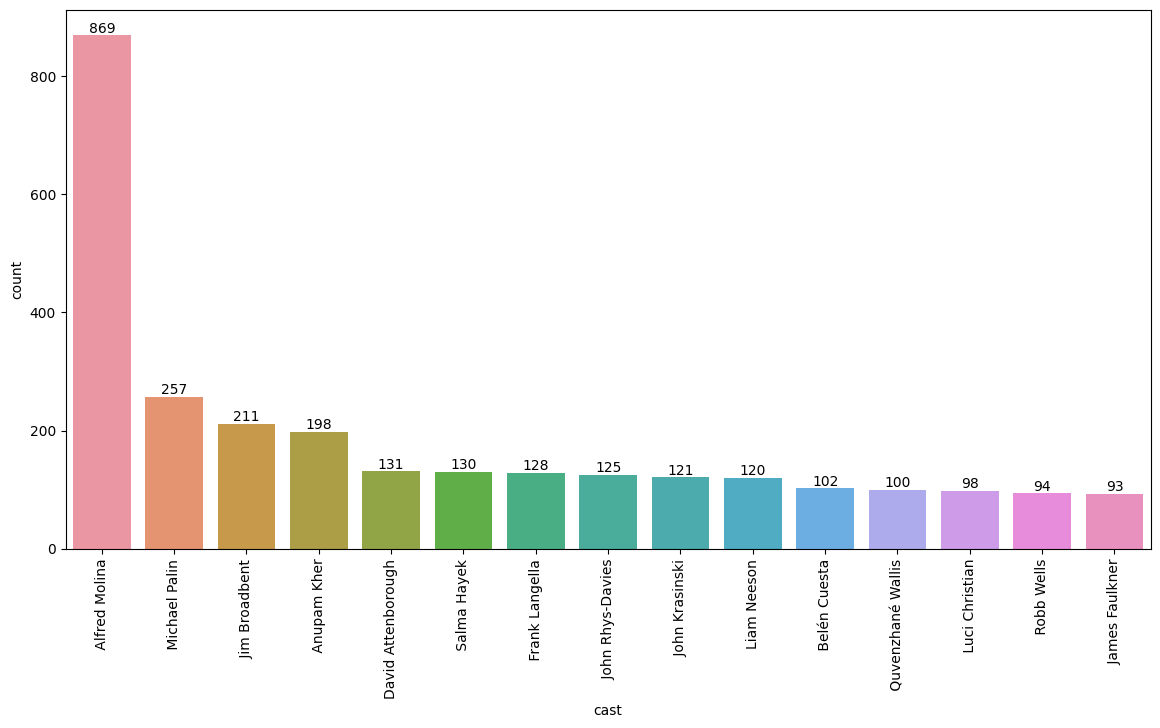

In [82]:
a = df_final['cast'].value_counts()
b = a.head(15)
plt.figure(figsize=(14,7))
ax = sns.countplot( x = 'cast', data = df_final, order = b.index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation = 90)
plt.show()

### Cast for each country

In [83]:
a = df_final[['cast', 'country']].value_counts().reset_index(name='count')

# Get the top 15 rows
b = a.head(15)


fig = px.bar(b, x='cast', y='count', color='country', title='Top Actors by Number of Shows/Movies')
for data in fig.data:
    # Iterate through the x and y data to add annotations
    for i in range(len(data['x'])):
        fig.add_annotation(
            x=data['x'][i],
            y=data['y'][i],
            text=str(data['y'][i]),
            showarrow=False,
            yshift=10,
            font=dict(size=10, color='#000000')
        )

# Customize the plot
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    xaxis_tickangle=90,
    barmode='group'
)

# Show the plot
fig.show()

#### Observations from the above graph

1. For Indian audience, movies/ tv-shows lead by Anupam Kher (in male actor category) and Radhika Apte (in female actor category) are liked by the audience. That's why Netflix India added more movies lead by  Anupam Kher and Radhika Apte.

2. In the US, movies by Alfred Molina are the most popular ones 

3. In the UK, movies by Michael Palin are the most popular ones 


#### Genre Count for each country

In [84]:
a = df_final.groupby(['listed_in', 'country'])['title'].count().reset_index(name='count')
a.sort_values(by='count', ascending=False, inplace=True)

# Select the top 15
b = a.head(15)



# Create a bar plot
fig = px.bar(b, x='listed_in', y='count', color='country', title='Type of Genre Different Countries')

# Add annotations
for bar in fig.data:
    for x_val, y_val in zip(bar.x, bar.y):
        fig.add_annotation(
            x=x_val,
            y=y_val + max(b['count']) * 0.02,  # Adjust this multiplier as needed
            text=str(y_val),
            showarrow=False,
            font=dict(size=10, color='#000000'),
            yshift=0
        )

# Customize the plot
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    xaxis_tickangle=45,
    barmode='group'
)

# Show the plot
fig.show()

#### Country **India** has produced maximum no of **International Movies** followed by **USA Comedy and Children & Family Movies** genre movies/ tv-shows and **dramas** genres movies and tv-shows produced by **India and US**. 

1. This means Indian director produced movies that are of international audience. This can help Netflix to increase it user base because international movies attract more subscribers/audience.

2. Americans want funny and comedy movies/tv_shows so if Netflix target on choosing more comedy movies apart from other genre movies.

3. Apparently, Indians are more into dramatic movies, therefore in order to increase the user base from India, Netflix can added more Dramas movies/ tv_shows

4. As expected, tv-Series and movies produced by Japanese director are more of cartoon types. Therefore in order to increase the user base in Japan, Netflix should added more Anime movies/ tv_shows



#### In the given dataset, **Indian Superstars** have maximum no of times as actors followed by **Japanese actor** like Takahiro and Yuki



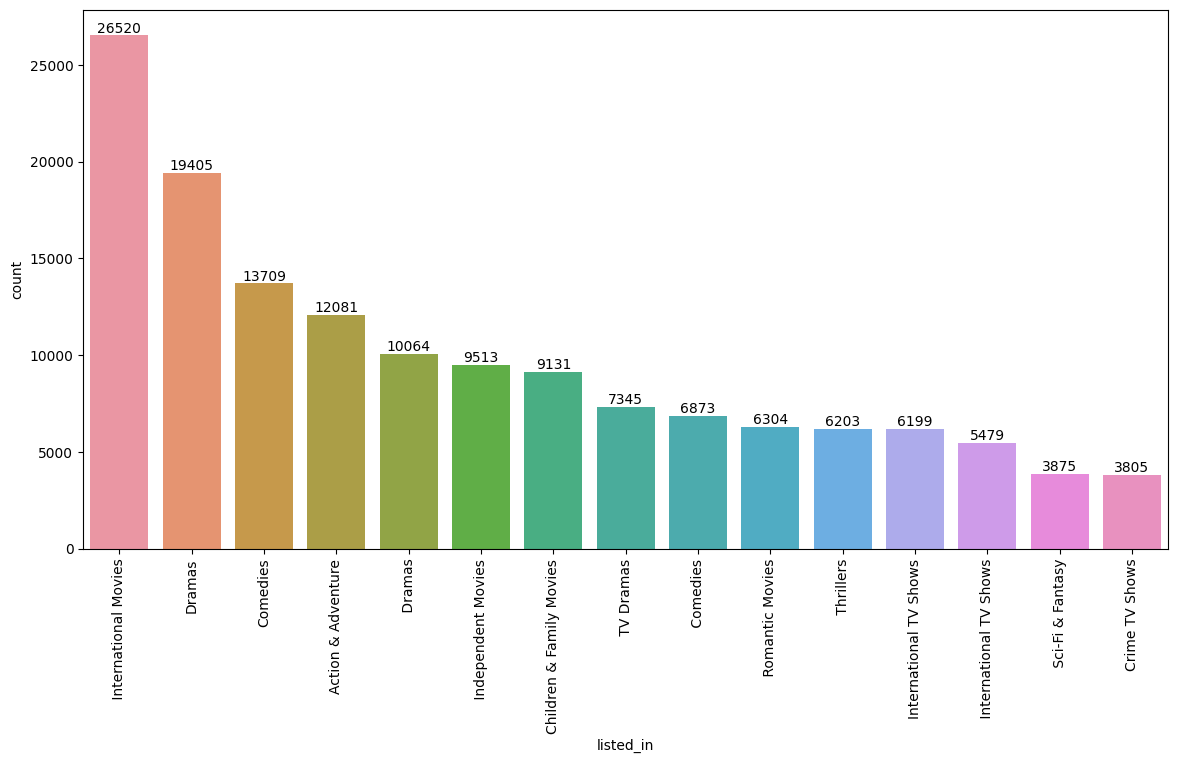

In [85]:
a = df_final['listed_in'].value_counts()
b = a.head(15)
plt.figure(figsize=(14,7))
ax = sns.countplot( x = 'listed_in', data = df_final, order = b.index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
                
plt.xticks(rotation = 90)
plt.show()

#### The given dataset has highest genre of  **International movies** followed by **Dramas** and **Comedies** 

1. International Movies are the most popular worldwide because they are for the international audience.
2. Dramas TV-Shows and Movies are like by the Indian population. Therefore in order to increase the user base from India, Netflix should added more Dramas movies/ tv_shows
3. Comedy and Action-Adventure movies are like by the Amercian population. Therefore in order to increase the user base in US, Netflix should added more Comedy and Action-Adventure movies/ tv_shows

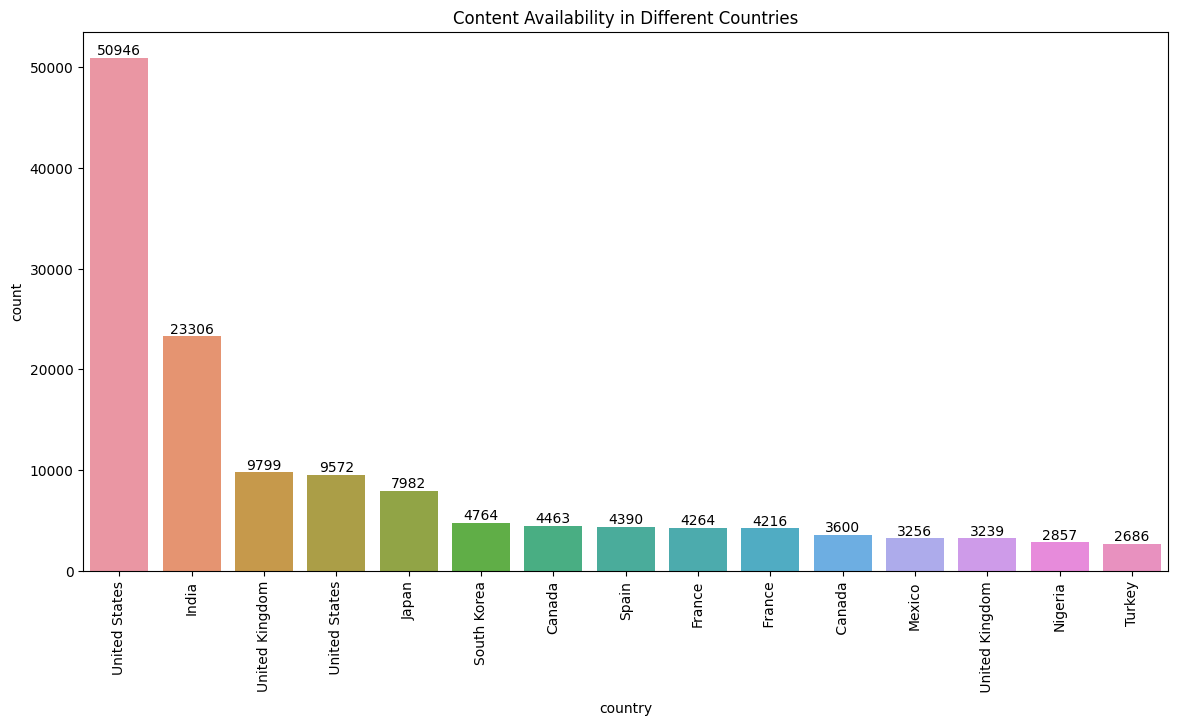

In [86]:
a = df_final['country'].value_counts()
b = a.head(15)
plt.figure(figsize=(14, 7))
ax = sns.countplot( x = 'country', data = df_final, order = b.index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.xticks(rotation = 90)
plt.title('Content Availability in Different Countries')
plt.show()

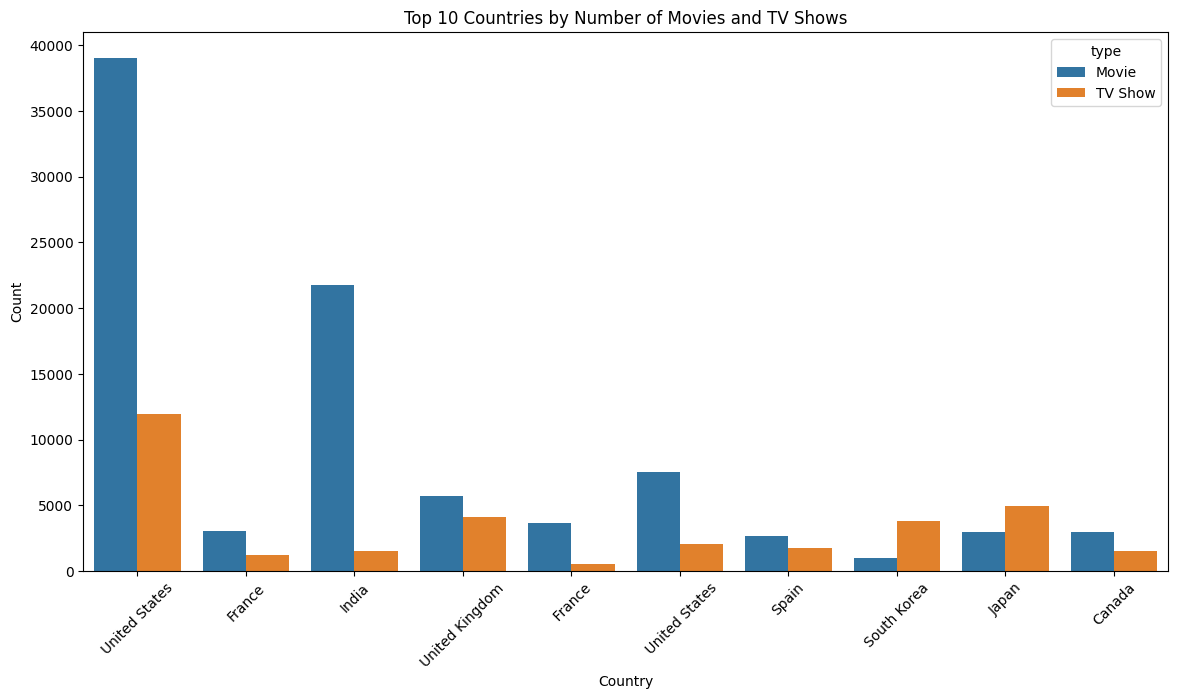

In [87]:
top_countries = df_final['country'].value_counts().head(10).index
plt.figure(figsize=(14, 7))
sns.countplot(data=df_final[df_final['country'].isin(top_countries)], x='country', hue='type')
plt.title('Top 10 Countries by Number of Movies and TV Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### In the given dataset, the movies and the tv-shows are maximum from the **US** followed by **India**

1. It can be observed that Amercians and Indians are likely to watch movies in Netflix rather than going out. However, it is also the case that they produced highest number of movies per year.

2. Indians are more into movies rather than long tv-shows. This means Indian short content rather than long tv-shows content.

3. Surprisely in south korea and japan people are more interested in watching tv-shows rather than movies. This is a indication that Netflix should added more tv-show rather than movies in Korea and Japan.


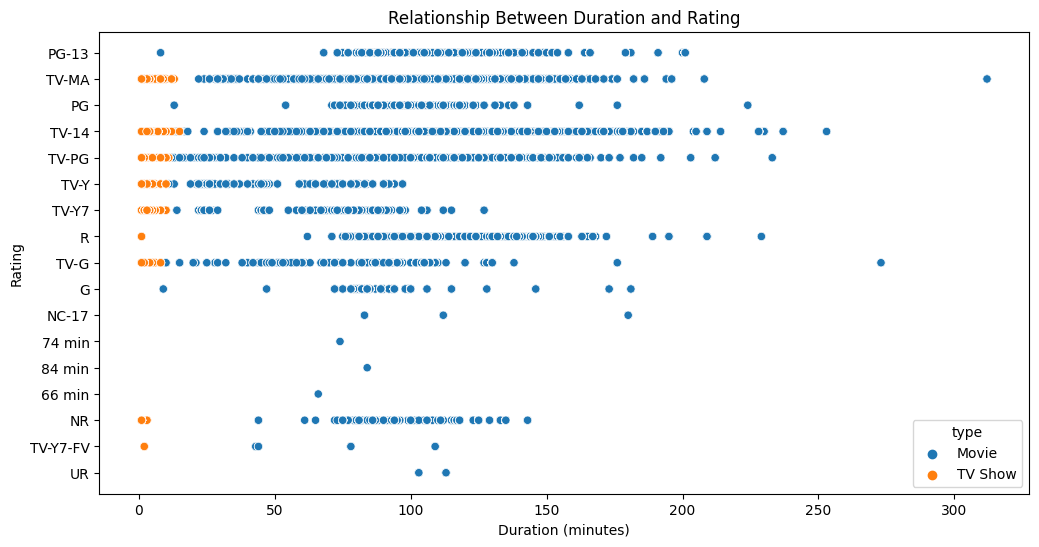

In [88]:
df_final['duration_numeric'] = df_final['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_final, x='duration_numeric', y='rating', hue='type')
plt.title('Relationship Between Duration and Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

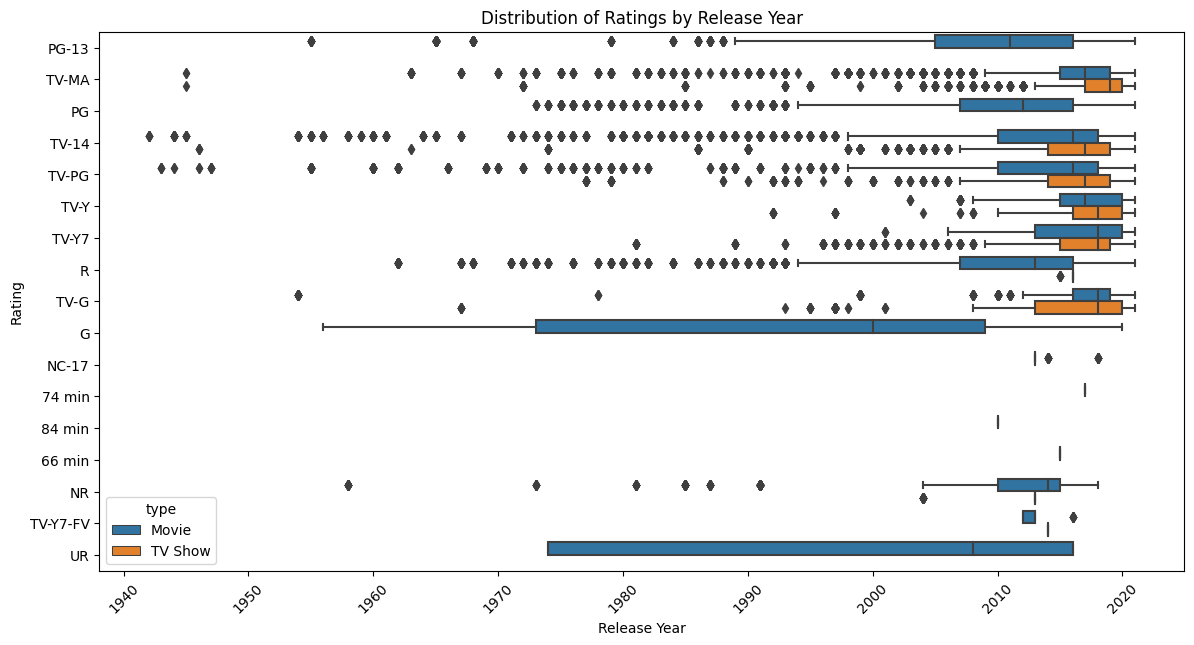

In [89]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_final, x='release_year', y='rating', hue='type')
plt.title('Distribution of Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

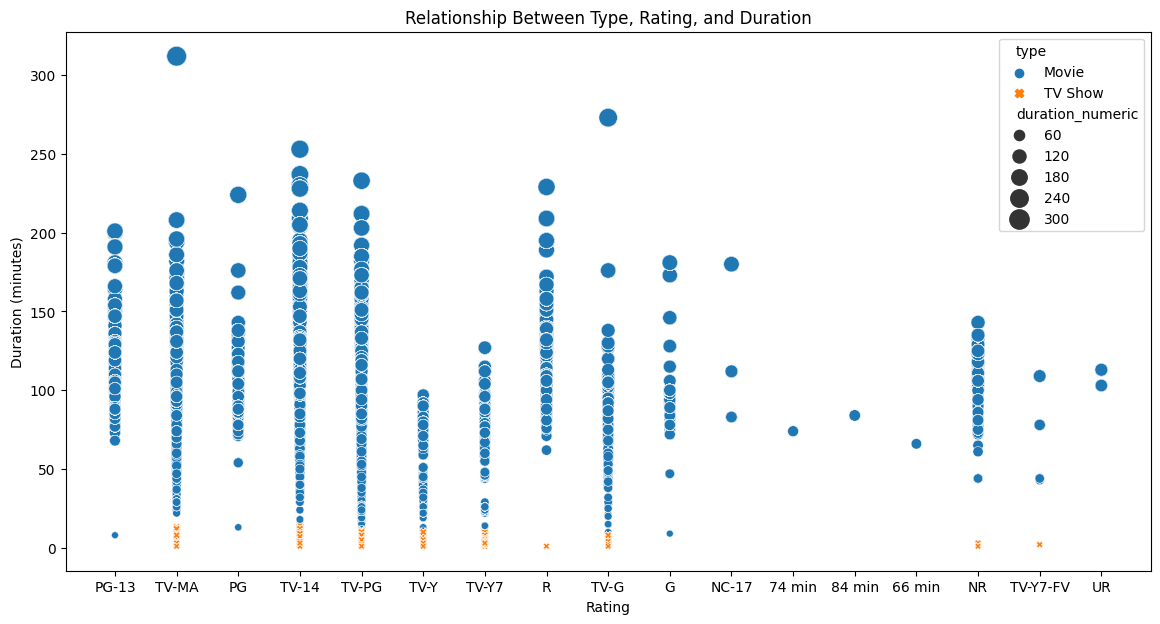

In [90]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_final, x='rating', y='duration_numeric', hue='type', style='type', size='duration_numeric', sizes=(20, 200))
plt.title('Relationship Between Type, Rating, and Duration')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.show()

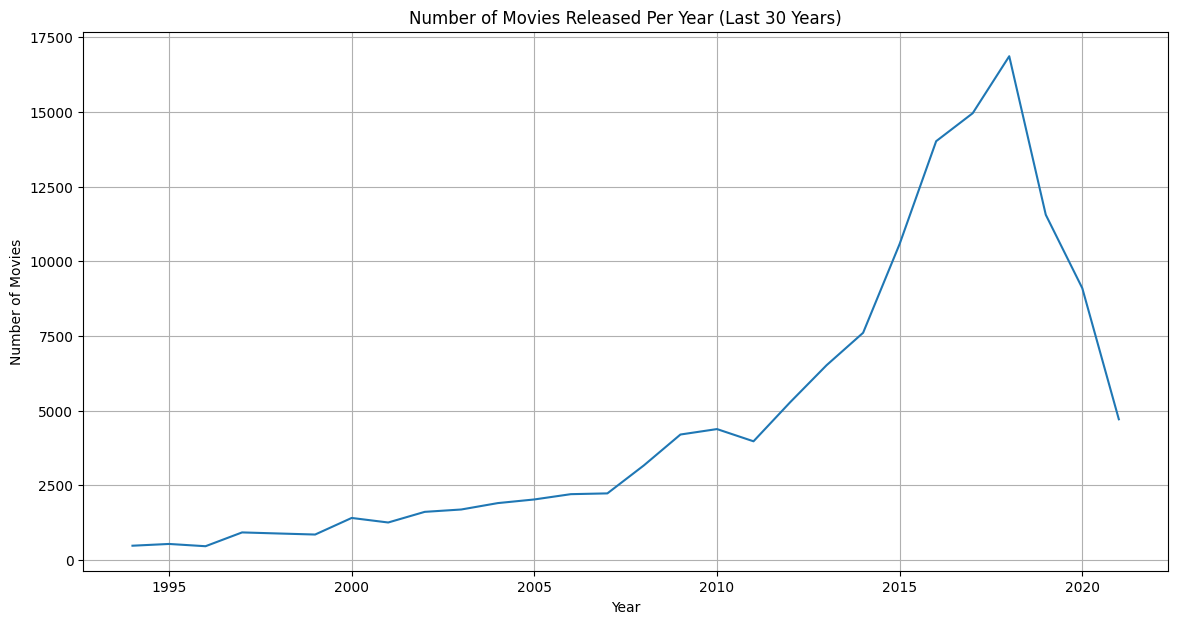

In [91]:
# Filter data for the last 30 years
df_last_30_years = df_final[df_final['release_year'] >= (pd.Timestamp.now().year - 30)]

# Count the number of movies released per year
movies_per_year = df_last_30_years[df_last_30_years['type'] == 'Movie'].groupby('release_year')['title'].count().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=movies_per_year, x='release_year', y='title')
plt.title('Number of Movies Released Per Year (Last 30 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()



### Over the past 30 years, the trend to watch movies/ tv-shows from netflix increases dramtically. Due to Corona, the use of Netflix is increase beacuse people were sitting in the house. In the future, if such situation happens, the use of Netflix will increase. 